# ¡Hola Jimena! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

-----

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Jimena has realizado un buen EDA has realizado un análisis exploratorio de datos (EDA) muy sólido, preparando meticulosamente la información y comparando los conjuntos de datos de entrenamiento y prueba, lo que demuestra un enfoque riguroso y sistemático en el tratamiento de los datos. Además normalizaste las reseñas , lo cual es clave cuando estamos trabajando con datos.
    
Has implementado correctamente el modelo dummy y tres modelos de análisis de texto (como te menciono más abajo el moderlo Bert no lo tendré en cuenta en la revisión por su tiempo de ejecución). 
    
Es importante que pruebes los modelos con las nuevas reseñas que aparecen al final del notebook, de esta forma podrás evaluar el rendimiento de los modelos frente a información nueva.

Esteré atento a tu próxima iteración 👀
    
*Estado del Proyecto:* **No Aprobado**

</div>

----

# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [2]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import spacy
import re
from sklearn.preprocessing import OrdinalEncoder

c:\Users\jimen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

#plt.style.use('seaborn')

In [4]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [5]:
df_reviews = pd.read_csv('dataset\imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\jimen\AppData\Local\Temp\ipykernel_1716\984704702.py:1: SyntaxWarning: invalid escape sequence '\i'
  df_reviews = pd.read_csv('dataset\imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
"""Vamos a hechar un vistazo rapido al dataset de las peliculas con sus reseñas 
y como es que esta distribuida la informacion."""

display(df_reviews.sort_values(by='start_year').head(10))

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
10014,tt0177707,short,Dickson Experimental Sound Film,Dickson Experimental Sound Film,1894,\N,1,0,"Music,Short",6.7,1988,The very first talking picture has returned fr...,10,pos,1,test,8470
10013,tt0177707,short,Dickson Experimental Sound Film,Dickson Experimental Sound Film,1894,\N,1,0,"Music,Short",6.7,1988,"This film is an eery, but interesting film. I ...",10,pos,1,test,8467
10012,tt0177707,short,Dickson Experimental Sound Film,Dickson Experimental Sound Film,1894,\N,1,0,"Music,Short",6.7,1988,It was on a day in 1891 when Scottish inventor...,8,pos,1,test,8469
10011,tt0177707,short,Dickson Experimental Sound Film,Dickson Experimental Sound Film,1894,\N,1,0,"Music,Short",6.7,1988,This is a pretty interesting experiment to wat...,8,pos,1,test,8468
10010,tt0177707,short,Dickson Experimental Sound Film,Dickson Experimental Sound Film,1894,\N,1,0,"Music,Short",6.7,1988,There have been several books that have cited ...,8,pos,1,test,8466
10009,tt0177707,short,Dickson Experimental Sound Film,Dickson Experimental Sound Film,1894,\N,1,0,"Music,Short",6.7,1988,This is the first recorded effort to put sound...,4,neg,0,test,2280
20256,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,1895,\N,1,0,"Documentary,Short",6.9,5951,It's utterly pointless to rate this film. It's...,8,pos,1,train,6636
20263,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,1895,\N,1,0,"Documentary,Short",6.9,5951,The appeal of ancient films like this one is t...,10,pos,1,train,6638
20262,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,1895,\N,1,0,"Documentary,Short",6.9,5951,What can i say about the first film ever? You ...,10,pos,1,train,6635
20265,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,1895,\N,1,0,"Documentary,Short",6.9,5951,All films made before 1912 really need to be v...,10,pos,1,train,6642


In [8]:
"""Verifiquemos que no tengamos datos duplicados o datos ausentes"""
print(df_reviews.duplicated().sum())
print(df_reviews.isna().sum())

0
tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64


In [9]:
"""Tenemos 2 columnas con valores ausentes pero marcadas con \\N,
revisaremos cuantos valores son ausentes, para poder remplazarlo con un 
valor o simplemente eliminar el dato sin que afecte el entrenamiento 
de los modelos. """

print(df_reviews['runtime_minutes'].unique())
print(df_reviews[df_reviews['runtime_minutes']=='\\N'].count())
df_reviews['runtime_minutes'] = df_reviews['runtime_minutes'].replace('\\N', np.nan)
df_reviews['runtime_minutes'] = pd.to_numeric(df_reviews['runtime_minutes'])
print('Mean en runtime_minutes -> ',df_reviews['runtime_minutes'].mean())
print('Median en runtime_minutes -> ',df_reviews['runtime_minutes'].median())

#df_reviews['runtime_minutes'] = df_reviews['runtime_minutes'].astype(int)
df_reviews['runtime_minutes'].replace(np.nan,95, inplace= True)
print(df_reviews['runtime_minutes'].unique())

['121' '25' '88' '85' '90' '113' '96' '99' '43' '82' '74' '100' '95' '129'
 '60' '92' '98' '104' '94' '116' '102' '141' '89' '120' '180' '97' '107'
 '87' '44' '149' '130' '40' '45' '84' '30' '\\N' '70' '126' '110' '93'
 '80' '78' '8' '118' '123' '106' '79' '109' '112' '139' '117' '46' '135'
 '31' '12' '1' '72' '58' '77' '150' '7' '101' '91' '138' '10' '108' '105'
 '61' '69' '152' '47' '65' '23' '119' '374' '225' '66' '71' '15' '114'
 '83' '20' '301' '216' '148' '155' '251' '67' '177' '103' '62' '81' '111'
 '140' '125' '122' '124' '76' '146' '42' '50' '400' '73' '115' '75' '200'
 '22' '133' '160' '86' '21' '128' '230' '29' '162' '127' '147' '53' '13'
 '151' '9' '278' '179' '63' '137' '59' '165' '1140' '263' '54' '143' '183'
 '131' '51' '157' '132' '64' '57' '11' '49' '5' '27' '17' '136' '175' '56'
 '14' '208' '156' '244' '144' '34' '167' '52' '55' '154' '360' '199' '19'
 '48' '178' '189' '41' '185' '145' '153' '18' '24' '176' '35' '265' '197'
 '68' '142' '6' '33' '134' '26' '3' '181' '1

C:\Users\jimen\AppData\Local\Temp\ipykernel_1716\1273311217.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reviews['runtime_minutes'].replace(np.nan,95, inplace= True)


In [10]:
print('Tenemos valores ausentes de la columna de end_year -> ',
      df_reviews['end_year'][df_reviews['end_year']=='\\N'].count())

Tenemos valores ausentes de la columna de end_year ->  45052


In [11]:
"""Tenemos 45052 valores en la caracteristica end_year ausentes, de 47331 valores
en total. Esto es un 95% de valores ausentes en total, no nos proporciona informacion
para poder entranar los modelos, por esto eliminaremos la columna.  
"""
df_reviews.drop('end_year', axis=1, inplace=True)

In [12]:
"""Revisemos las diferencias de agrupamientos de las reseñas positivas
y negativas cuando estan apilados y cuando no."""

print(df_reviews.groupby(['start_year', 'pos'])['pos'].count(),'\n')
print(df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack())

start_year  pos
1894        0        1
            1        5
1895        1       12
1897        1        4
1902        0        1
                  ... 
2008        0      679
            1      312
2009        0      247
            1      139
2010        0       27
Name: pos, Length: 207, dtype: int64 

pos              0       1
start_year                
1894           1.0     5.0
1895           NaN    12.0
1897           NaN     4.0
1902           1.0     NaN
1903           7.0     3.0
...            ...     ...
2006        1892.0  1383.0
2007        1385.0   721.0
2008         679.0   312.0
2009         247.0   139.0
2010          27.0     NaN

[107 rows x 2 columns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Jimena gran trabajo en esta análisis inicial de los datos. Hiciste una validación de los datos duplicados y manejaste correctamente los datos faltantes. Esto es clave para evitar errores en el desarrollo de los modelos predictivos.

</div>

## EDA (Análisis exploratorio de datos)

Veamos el número de películas y reseñas a lo largo de los años.

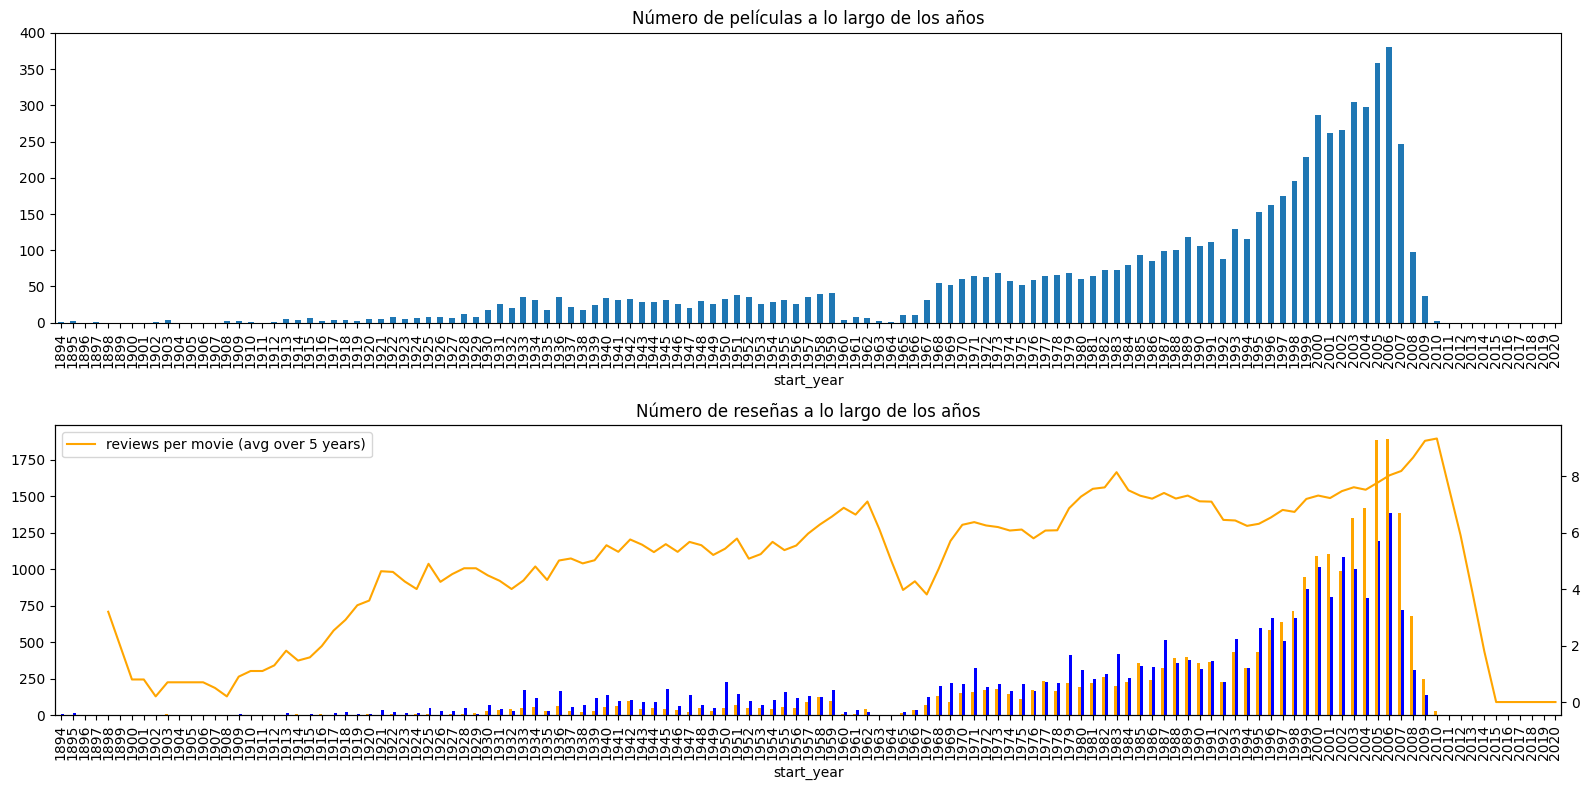

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')
ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft2.plot(kind='bar', label='#reviews (neg, pos)', ax=ax, color=['orange', 'blue'])#, stacked=True
#plt.legend(['0 = Naranja', '1 = Azul'], title="Categoría", loc="upper right")

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)

axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Podemos ver que a lo largo de los años, empezando por 1894 el numero de peliculas ha incrementando bastante, parece que el inicio fue duro hasta se observa que se mantuvo estatico desde 1930 a 1959. Despues de esto, hubo una fuerte decaida y para 1967 empezaron a salir mas peliculas y la industria parace que creció exponencialmente; con el mayor pico en el 2006. Despues de este año parece que la indrustria se debilito un poco, sin embargo no tenemos datos actuales ya que estos datos corresponden hasta el 2010.

En general en la segunda grafica podemos ver que mientras mas peliculas se generaban, entre 1997 y el 2010, las criticas negativas predominaban, mientras que cuando empezaban a salir peliculas antes de 1997, aparte de no se tantas peliculas, parece que la critica era buena para ellas. Eso puede ser porque no habia tanta comparacion y tanta tecnologia para como en los 2000s que se buscaba mejor calidad y una mejores historias que contar.

Entonces en promedio la cantidad de reseñas por pelicula por cada 5 años mantiene una tendecia de crecimiento, luego desciende y despues de esa caida abrupta vuelve a crecer y se mantiene por algunos años.



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis ofrece una perspectiva interesante sobre la evolución de la industria cinematográfica, destacando cómo el número de películas y las críticas han variado a lo largo del tiempo. Has identificado correctamente el comportamiento de los datos. Además, has notado una correlación entre el aumento en la producción de películas y el predominio de críticas negativas, sugiriendo que la mayor competencia y expectativas de calidad podrían influir en este fenómeno. La observación sobre la tendencia cíclica en las reseñas por película también es acertada. Para futuros análisis, sería valioso explorar factores externos, como cambios tecnológicos, preferencias del público o eventos históricos, que podrían explicar estas fluctuaciones.



</div>

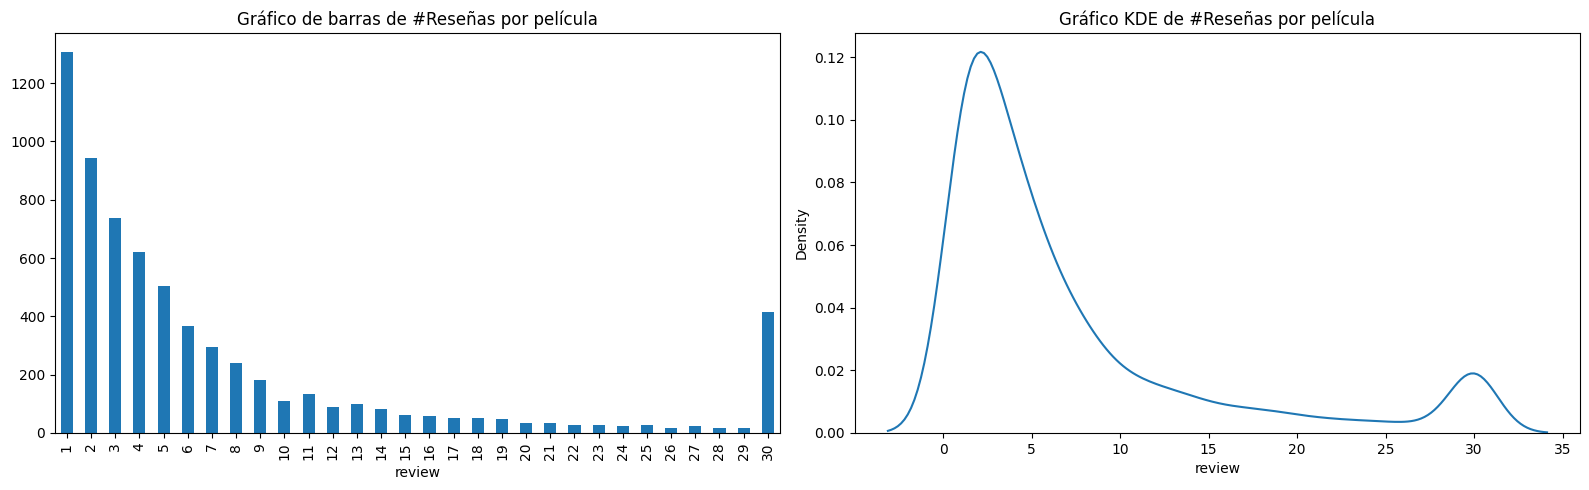

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

In [15]:
df_reviews['pos'].value_counts()

pos
0    23715
1    23616
Name: count, dtype: int64

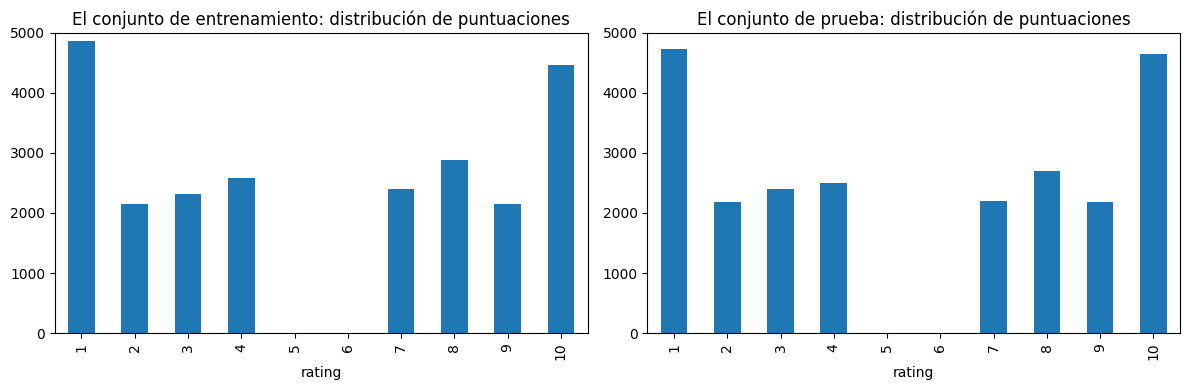

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

C:\Users\jimen\AppData\Local\Temp\ipykernel_1716\1324160450.py:14: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\jimen\AppData\Local\Temp\ipykernel_1716\1324160450.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
C:\Users\jimen\AppData\Local\Temp\ipykernel_1716\1324160450.py:30: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\jimen\AppData\Local\Temp\ipykernel_1716\1324160450.py:31: UserWarning: 

Support for alter

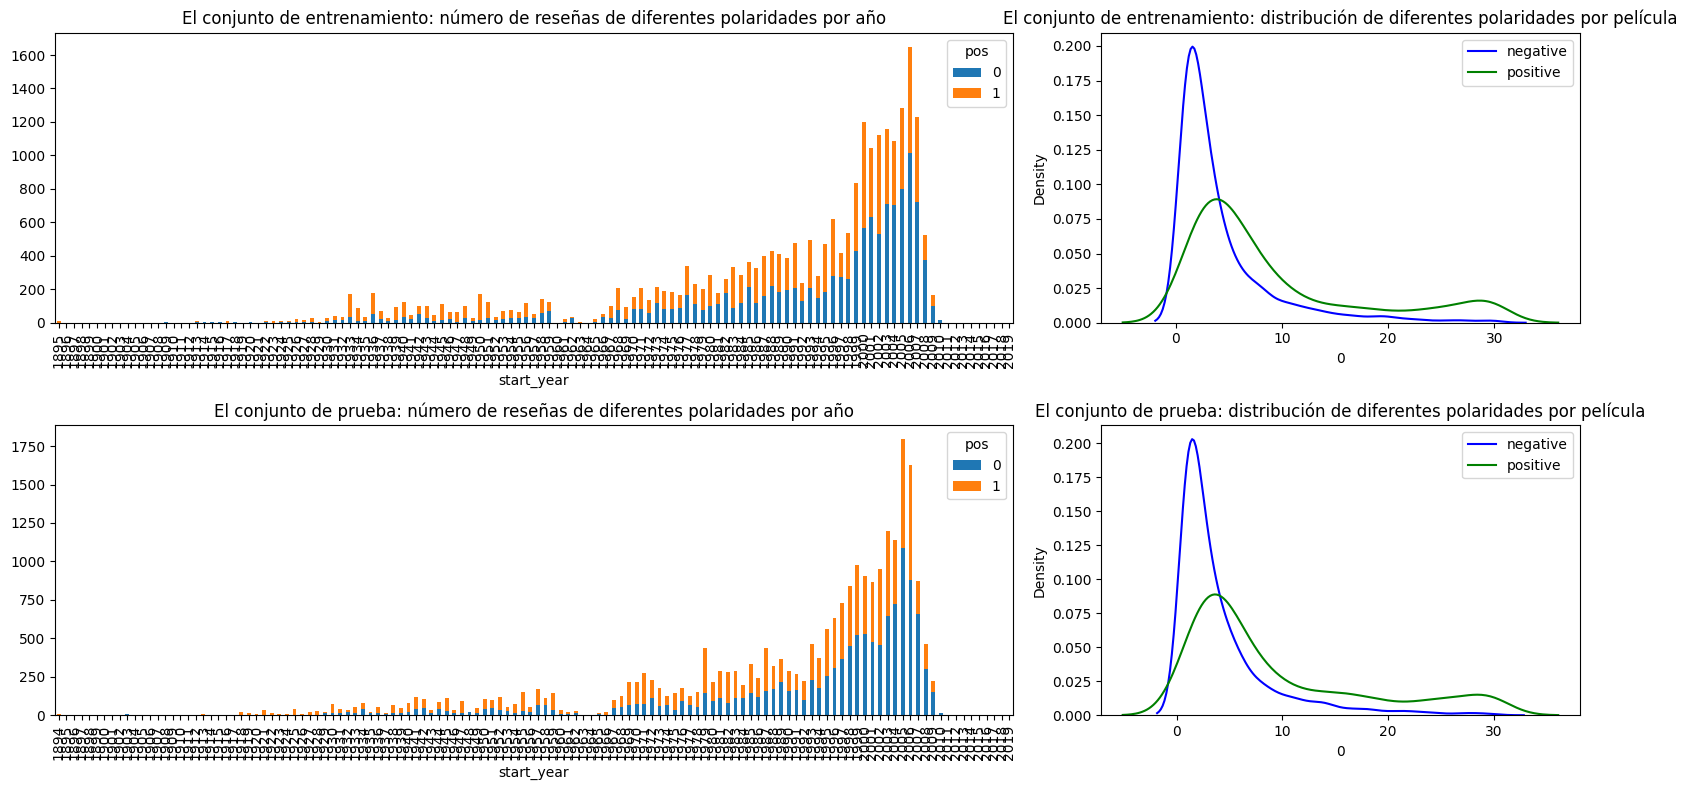

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Jimena hiciste un excelente análisis exploratorio de datos evaluando el balance entre las clases que se van a predecir y comparando los datos de entrenamiento y prueba. Esto es clave para establecer nuestra hoja de ruta y estar seguros que los modelos predictivos no se van a ver afectados por la estructura de los datos. Adicionalmente seleccionaste herramientas de visualización claves para lograr entender la distribución de los datos.

</div>

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [18]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
        #print(eval_stats)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(3)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

+ Utilizaremos la libreria spacy para lemantizar las reseñas.
+ Para codificar los datos categoricos usaremos la libreria Ordinal Encoder para poder normalizar los datos en numericos. 


In [19]:
nlp = spacy.load('en_core_web_sm' , disable= ['parser' , 'ner'])

In [20]:
def clear_text(text):
    clean_text = re.sub(r'[^a-zA-Z\s]',' ',text)
    clean_text = " ".join(clean_text.split())
    return clean_text

In [21]:
def lemmatize(text):
    doc = nlp(text.lower())
    lemmas = []
    for token in doc:
        lemmas.append(token.lemma_ )
    return ' '.join(lemmas)

In [22]:
"""NOTA. Dado la cantidad de resañas y que este proceso es muy largo,
toma 8 minutos en terminarlo."""
df_reviews['review_norm'] = df_reviews['review'].astype(str).apply(lambda x: lemmatize(clear_text(x)))

In [23]:
"""Observemos que las reseñas han sido lemmantizadas. """
print(df_reviews['review'].head(5),'\n')

print(df_reviews['review_norm'].head(5))

0    The pakage implies that Warren Beatty and Gold...
1    How the hell did they get this made?! Presenti...
2    There is no real story the film seems more lik...
3    Um .... a serious film about troubled teens in...
4    I'm totally agree with GarryJohal from Singapo...
Name: review, dtype: object 

0    the pakage imply that warren beatty and goldie...
1    how the hell do they get this make present its...
2    there be no real story the film seem more like...
3    um a serious film about troubled teen in singa...
4    I m totally agree with garryjohal from singapo...
Name: review_norm, dtype: object


In [24]:
"""Codificaremos los datos categoricos a numeros para tener todas las 
caracteristicas en un solo tipo de varible.  """
encoder = OrdinalEncoder()
encoder.fit(df_reviews[['title_type','primary_title','original_title','genres']])
df_reviews_encoded = encoder.transform(df_reviews[['title_type','primary_title','original_title','genres']])
df_reviews_encoded = pd.DataFrame(df_reviews_encoded, columns=['title_type', 
                                                               'primary_title', 'original_title', 'genres'])

df_number_only = df_reviews.select_dtypes(include=['number'])

In [25]:
print('Caracteristicas numericas -> \n',df_number_only.head())
print('\nCaracteristicas categoticas cofificadas-> \n',df_reviews_encoded.head())

Caracteristicas numericas -> 
    start_year  runtime_minutes  is_adult  average_rating  votes  rating  pos  \
0        1971            121.0         0             6.3   2218       1    0   
1        1971            121.0         0             6.3   2218       1    0   
2        2002             25.0         0             6.3    184       3    0   
3        2002             25.0         0             6.3    184       7    1   
4        2002             25.0         0             6.3    184       9    1   

    idx  
0  8335  
1  8336  
2  2489  
3  9280  
4  9281  

Caracteristicas categoticas cofificadas-> 
    title_type  primary_title  original_title  genres
0         0.0            0.0             0.0   263.0
1         0.0            0.0             0.0   263.0
2         1.0            1.0             1.0   288.0
3         1.0            1.0             1.0   288.0
4         1.0            1.0             1.0   288.0


In [26]:
df_complete = pd.concat([df_number_only, df_reviews_encoded,df_reviews['review_norm'],df_reviews['ds_part']], axis='columns')
print(df_complete.head())

   start_year  runtime_minutes  is_adult  average_rating  votes  rating  pos  \
0        1971            121.0         0             6.3   2218       1    0   
1        1971            121.0         0             6.3   2218       1    0   
2        2002             25.0         0             6.3    184       3    0   
3        2002             25.0         0             6.3    184       7    1   
4        2002             25.0         0             6.3    184       9    1   

    idx  title_type  primary_title  original_title  genres  \
0  8335         0.0            0.0             0.0   263.0   
1  8336         0.0            0.0             0.0   263.0   
2  2489         1.0            1.0             1.0   288.0   
3  9280         1.0            1.0             1.0   288.0   
4  9281         1.0            1.0             1.0   288.0   

                                         review_norm ds_part  
0  the pakage imply that warren beatty and goldie...   train  
1  how the hell do t

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Perfecto proceso de normalización, esto es muy importante para aumentar el rendimiento de los modelos. Tu estrategía de normalización incluyendo el uso de expresiones regulares es adecuada, aunque quiero compartirte este artículo para conoce [estrategías de normalización](https://spotintelligence.com/2023/01/25/text-normalization-techniques-nlp/) de texto que te puede ser útil para futros proyectos

</div>

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [27]:
"""De la columna ds_part donde tenemos que peliculas con todas sus 
reseñas son parte del entrenamiento y cuales son de prueba. Podemos 
ver cuales son las caracteristicas con las que trabajaremos y el 
tamaño de cada grupo (train and test)"""

df_reviews_train = df_complete.query('ds_part == "train"').copy()
df_reviews_test = df_complete.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

df_reviews_train = df_reviews_train.drop(['pos', 'ds_part', 'idx'],axis=1)
df_reviews_test = df_reviews_test.drop(['pos', 'ds_part', 'idx'],axis=1)

print('Tamaño de las caracterisitas y cantidad de datos en el conjunto de entrenamiento ->',
      df_reviews_train.shape)
print('Tamaño de las caracterisitas y cantidad de datos en el conjunto de prueba ->',
      df_reviews_test.shape)
print('Caracterisitas a trabajar el conjunto de entrenamiento ->',
      df_reviews_train.columns)
print('Caracterisitas a trabajar el conjunto de prueba ->',
      df_reviews_test.columns)

Tamaño de las caracterisitas y cantidad de datos en el conjunto de entrenamiento -> (23796, 11)
Tamaño de las caracterisitas y cantidad de datos en el conjunto de prueba -> (23535, 11)
Caracterisitas a trabajar el conjunto de entrenamiento -> Index(['start_year', 'runtime_minutes', 'is_adult', 'average_rating', 'votes',
       'rating', 'title_type', 'primary_title', 'original_title', 'genres',
       'review_norm'],
      dtype='object')
Caracterisitas a trabajar el conjunto de prueba -> Index(['start_year', 'runtime_minutes', 'is_adult', 'average_rating', 'votes',
       'rating', 'title_type', 'primary_title', 'original_title', 'genres',
       'review_norm'],
      dtype='object')


Entonces tenemos 261 reseñas mas en el conjunto de entrenamiento que en el conjunto de prueba. 
Se dejaron las columnas de el año en que salió la pelicula, los minutos que dura la pelicula, si es para adultos o no, el rating promedio, los vatos, el rating, el tipo de titulo, el titulo, el titulo original, el genero y claro que la reseña lemantizada. 

## Trabajar con modelos

### Modelo 0 - Constante

Para la prueba de cordura se utilizará la libreria DummyClassifier con un modelo uniforme, donde se predice la clase al azar con igual probabilidad. Utilizaremos la funcion evalute_model pasando el modelo, el conjunto de entramiento, el conjunto de prueba y sus respectivos conjuntos con el objetivo para predecir la probalidad de que sea reseña positiva y de igual forma poder evaluar su exactitud, calcular su F1_score, ver la curva ROC y PCR. 

In [28]:
from sklearn.dummy import DummyClassifier

In [29]:
"""Considerando un modelo uniforme, donde se predice una clase al azar con igual probabilidad."""
dummy_clf = DummyClassifier(strategy= 'uniform', random_state= 12345)
dummy_clf.fit(df_reviews_train , train_target)

DummyClassifier(random_state=12345, strategy='uniform')

          train   test
Accuracy  0.501  0.498
F1        0.503  0.499
APS       0.499  0.498
ROC AUC   0.500  0.500


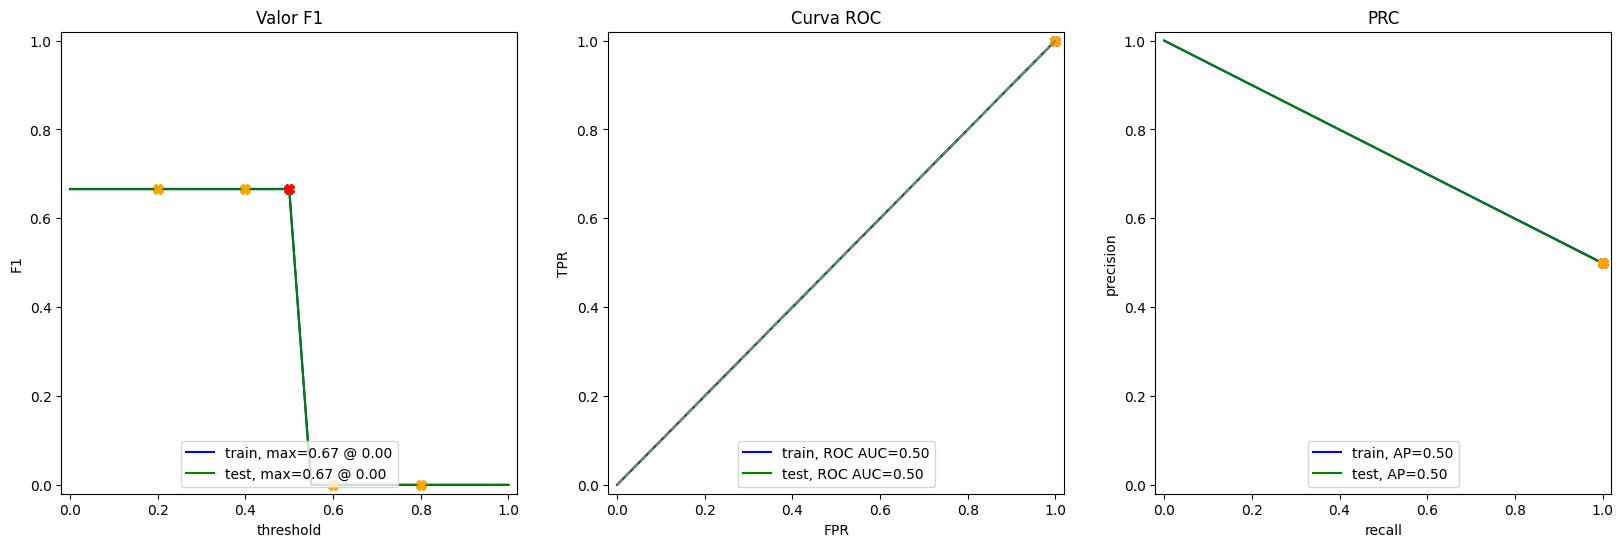

In [30]:
"""Utilizando la funcion de evaluacion para las metricas F1, APS y ROC AUC"""
evaluate_model(dummy_clf, df_reviews_train, train_target, df_reviews_test, test_target)

Para un modelo donde solo se predice una clase al azar con igual probabilidad y tenemos un valor de F1 de 0.49, no es malo, no es el mejor. Es casi como aventar un monera al aire y dejarlo al azar. Intentemos con otros modelos para ver que se comportan. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Buen trabajo con el desarrollo del modelo dummy, ahora tenemos un valor de referencia para evaluar el rendimiento de los modelos y estar seguros que las predicciones no sean solo azar. 

</div>

### Modelo 1 - spaCy, TF-IDF y LR

Aplicaremos el modelo de Logistic Regression cambiando el threshold para determinar si es 0 o 1 (negativa o positiva) la reseña. 
Usaremos la libreria TF-IDF para vectorizar las reseñas y que el modelo trabaje con numeros en vez de con palabras. Le mandaremos las reseñas lemantizadas para que sea mas sencillo manejar la informacion. 

In [31]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
#stopwords = set(nltk_stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words= 'english')
tf_idf = count_tf_idf.fit_transform(df_reviews_train['review_norm'])

In [33]:
print(tf_idf.shape)
print(type(tf_idf))

(23796, 58920)
<class 'scipy.sparse._csr.csr_matrix'>


In [34]:
feature_train_tf_idf = tf_idf
test_corpus = df_complete.query('ds_part == "test"').copy()

feature_test_tf_idf = count_tf_idf.transform(test_corpus['review_norm'])

print(feature_train_tf_idf.shape)
print(feature_test_tf_idf.shape)

(23796, 58920)
(23535, 58920)


In [35]:
model_LR = LogisticRegression()
model_LR.fit(feature_train_tf_idf, train_target)

LogisticRegression()

          train   test
Accuracy  0.930  0.875
F1        0.930  0.874
APS       0.979  0.943
ROC AUC   0.979  0.946


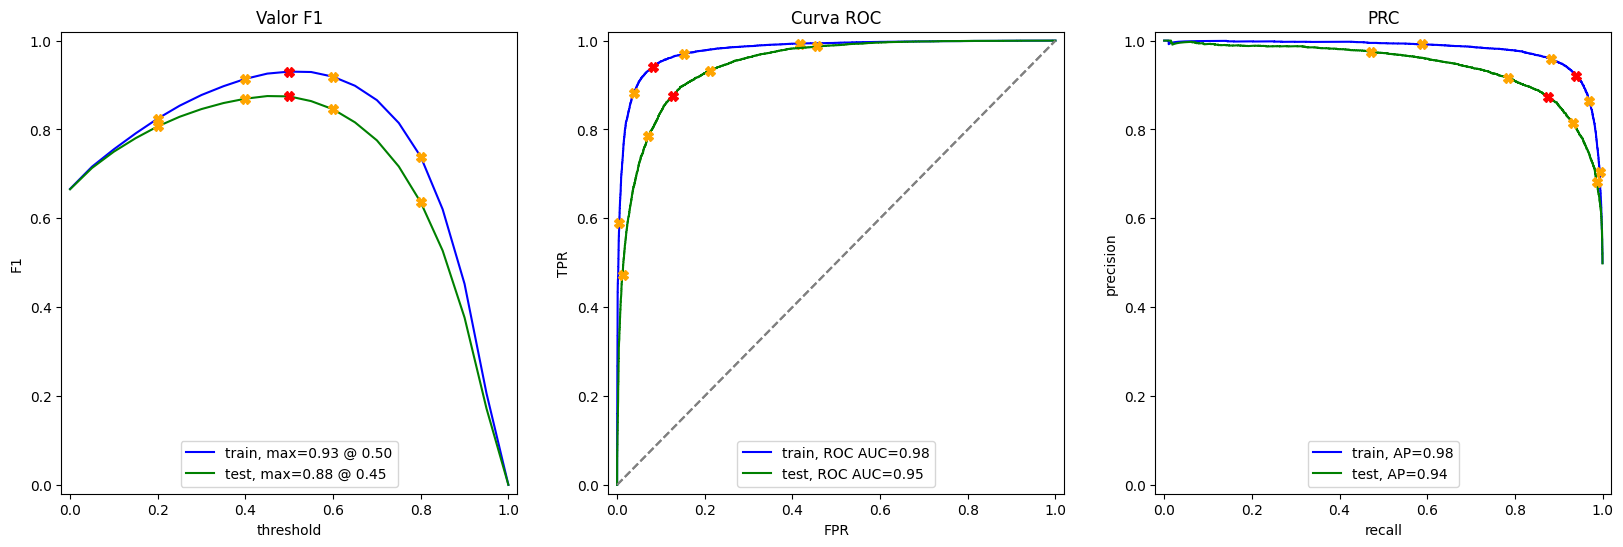

In [36]:
evaluate_model(model_LR, feature_train_tf_idf, train_target, feature_test_tf_idf, test_target)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Perfecta comparativa entre los datos de entrenamiento y prueba. De manera general, podemos ver que el conjunto de entrenamiento tiene un mejor rendimiento, lo que puede ser un indicio de un sobreajuste; no obstante, el rendimiento con los datos de prueba también es muy bueno. 

</div>

### Modelo 2 - spaCy, TF-IDF y LGBMClassifier

In [37]:
import lightgbm as lgb

In [38]:
model_LGBM = lgb.LGBMClassifier( 
    boosting_type="gbdt",  # Gradient Boosting Decision Trees
    num_leaves=31,  # Hojas en cada árbol (controla la complejidad)
    learning_rate=0.05,  # Tamaño del paso en la optimización
    n_estimators=100,  # Número de árboles
    random_state=42
    )
model_LGBM.fit(feature_train_tf_idf, train_target)

[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.271711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 428306
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 9200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353


LGBMClassifier(learning_rate=0.05, random_state=42)

          train   test
Accuracy  0.866  0.834
F1        0.868  0.835
APS       0.942  0.913
ROC AUC   0.943  0.916


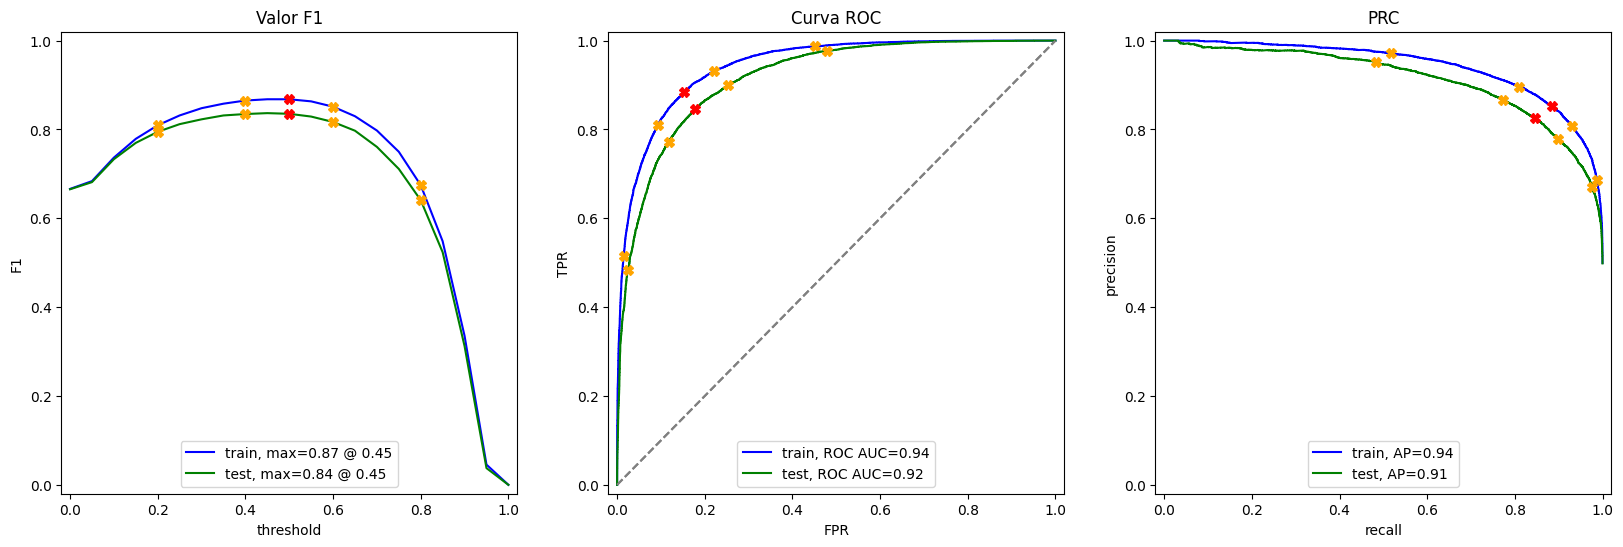

In [39]:
evaluate_model(model_LGBM, feature_train_tf_idf, train_target, feature_test_tf_idf, test_target)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Acá tenemos un comportamiento similar al modelo anterior, esto era de esperarse y nos indica que tenemos consistencia en la implementación

</div>

# Modelo 3 - spaCy, TF-IDF y Cat

In [40]:
import catboost

model_cat = catboost.CatBoostClassifier(
    iterations=100,  # Número de iteraciones
    depth=6,  # Profundidad del árbol
    learning_rate=0.05,  # Tasa de aprendizaje
    loss_function="Logloss",  # Para clasificación binaria
    verbose=100,
    random_seed=42
)
model_cat.fit(feature_train_tf_idf, train_target)

0:	learn: 0.6787016	total: 561ms	remaining: 55.5s
99:	learn: 0.4434115	total: 26s	remaining: 0us


          train   test
Accuracy  0.812  0.807
F1        0.823  0.818
APS       0.898  0.891
ROC AUC   0.901  0.896


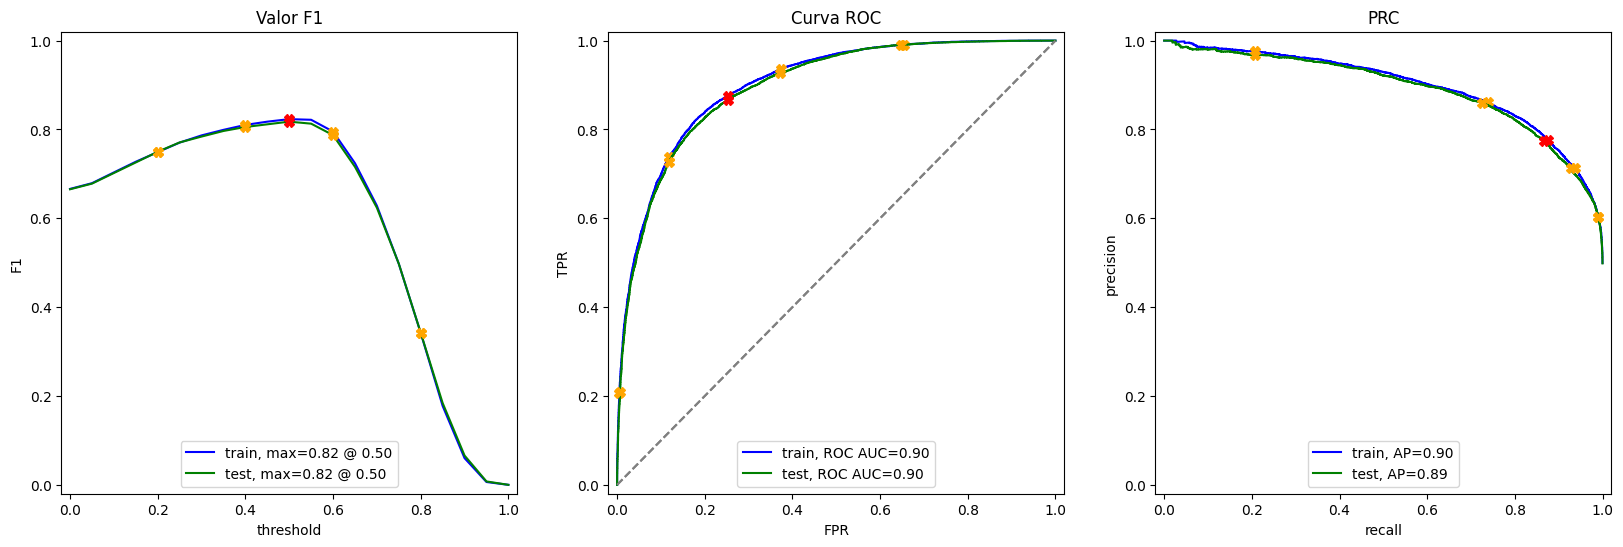

In [41]:
evaluate_model(model_cat, feature_train_tf_idf, train_target, feature_test_tf_idf, test_target)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Este último modelo tiene un rendimiento menor que los anteriores, ¿por qué crees que se presenta esta diferencia?

</div>

## Mis reseñas

In [ ]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = my_reviews['review'].astype(str).apply(lambda x: lemmatize(clear_text(x)))
tf_idf = count_tf_idf.fit_transform(df_reviews_train['review_norm'])

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",I do not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well I be bored and feel asleep in the middle ...
2,I was really fascinated with the movie,I be really fascinate with the movie
3,Even the actors looked really old and disinter...,even the actor look really old and disinterest...
4,I didn't expect the reboot to be so good! Writ...,I didn t expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie have its upside and downside but I f...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launch on netflix be a brave move I really app...


In [44]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_LR.predict_proba(count_tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  I do not simply like it not my kind of movie
0.09:  well I be bored and feel asleep in the middle of the movie
0.63:  I be really fascinate with the movie
0.20:  even the actor look really old and disinterested and they get pay to be in the movie what a soulless
0.20:  I didn t expect the reboot to be so good writer really care about the source material
0.49:  the movie have its upside and downside but I feel like overall it s a decent flick I could see mysel
0.04:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid win
0.92:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t


In [45]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_LGBM.predict_proba(count_tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.62:  I do not simply like it not my kind of movie
0.52:  well I be bored and feel asleep in the middle of the movie
0.62:  I be really fascinate with the movie
0.54:  even the actor look really old and disinterested and they get pay to be in the movie what a soulless
0.73:  I didn t expect the reboot to be so good writer really care about the source material
0.58:  the movie have its upside and downside but I feel like overall it s a decent flick I could see mysel
0.39:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid win
0.70:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t


In [46]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_cat.predict_proba(count_tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.60:  I do not simply like it not my kind of movie
0.60:  well I be bored and feel asleep in the middle of the movie
0.60:  I be really fascinate with the movie
0.59:  even the actor look really old and disinterested and they get pay to be in the movie what a soulless
0.64:  I didn t expect the reboot to be so good writer really care about the source material
0.59:  the movie have its upside and downside but I feel like overall it s a decent flick I could see mysel
0.48:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid win
0.61:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t


## Conclusiones

Se utilizaron 3 diferentes modelos para medir el mejor f1 para la clasificacion de reseñas positivas y negativas de diferentes peliculas. 
Logistic Regression, CatBoostClassifier y LightGBMClassifier, fueron entrenados con las reseñas lemantizadas y vectorizadas para un mejor manejo del texto. Se realizó una evaluacion ajustando el threshold (el limite) para determinar en que punto es 0 y cuando es 1. 

Primero se entrenó un modelo uniforme como prueba de condura para analizar cual es el "limite" inferior en las predicciones para en la metrica f1, es decir, revisar cual es la evaluacion de f1_score cuando solo se eligé un valor (0 o 1) al azar con la misma probabilidad. Este modelo dió un valor de f1_score de 0.49, por lo que es tener la mitad bien y la otra mitad mal, como lanzar una moneda al aire. 

El mejor modelo entrenado fue el LogistRegression, con 0.87 de f1_score con un limite de clasificacion de 0.45. Esto es mejor que el limite deseado para la empresa Film Junky Union. Podran estar seguros de que la pelicula obtuvo una reseña positiva o negativa sin tener que leer cada una de ellas.

Tras enviar reseñas propias, positivas y negativas, a los tres diferentes modelos para analizar lo que cada modelo haría prediciría con reseñas completaminete nuevas. A continuacion tenemos la secuancia correcta de las propias reseñas:

- Negativa
- Negativa
+ Positiva
- Negativa
+ Positiva
+ Positiva
- Negativa
+ Positiva

Considerando que 1 es positiva, 0 es negativa y se esta calculando la probabilidad de estas nuevas reseñas, podemos ver que Logistic Regression tiene una mejor puntuacion real. Esto se puede dar a que como esta dividido los datos y como es que procesan los otros dos modelos la informacion. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Implemntaste correctamente los modelos de clasificación de reseñas. Respecto al modelo BERT, puede resultar excesivo en tiempo de ejecución (por esa razón no la tendré en cuenta la revisión), pero la idea es que lo conozcas para que un futuro sea una opción como herramienta de análisis de lenguaje. BERT destaca en NLP por su comprensión bidireccional del contexto, lo que permite captar mejor las relaciones entre palabras en una oración. Su preentrenamiento en tareas generales, como predicción de palabras y relaciones entre frases, facilita el ajuste a tareas específicas con menor costo computacional. Además, su arquitectura basada en Transformers garantiza eficiencia y escalabilidad, mientras que su capacidad multilingüe y rendimiento superior en benchmarks lo hacen versátil. La amplia adopción y soporte de la comunidad también impulsan su aplicabilidad en proyectos reales, consolidándolo como una herramienta poderosa y flexible.



<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Es importante que realices las pruebas con las reseñas nuevas (las que están al final de la plantilla), con el fin de ver el rendimiento de los modelos cuando se enfrenatan a información que no hayan visto. Con esta información puedes complementar tu análisis y conclusión general

</div>

</div>

# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código 
- [ ]  Hay conclusiones 